<a href="https://colab.research.google.com/github/MONTIELIVAN/ShamanTools/blob/main/ESTADISTICA_ING_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Ubicación  Frecuencia Absoluta  Frecuencia Relativa
0       Perú                  747               0.1494
1     México                  728               0.1456
2     Brasil                  724               0.1448
3     España                  721               0.1442
4  Argentina                  707               0.1414
5      Chile                  703               0.1406
6   Colombia                  670               0.1340


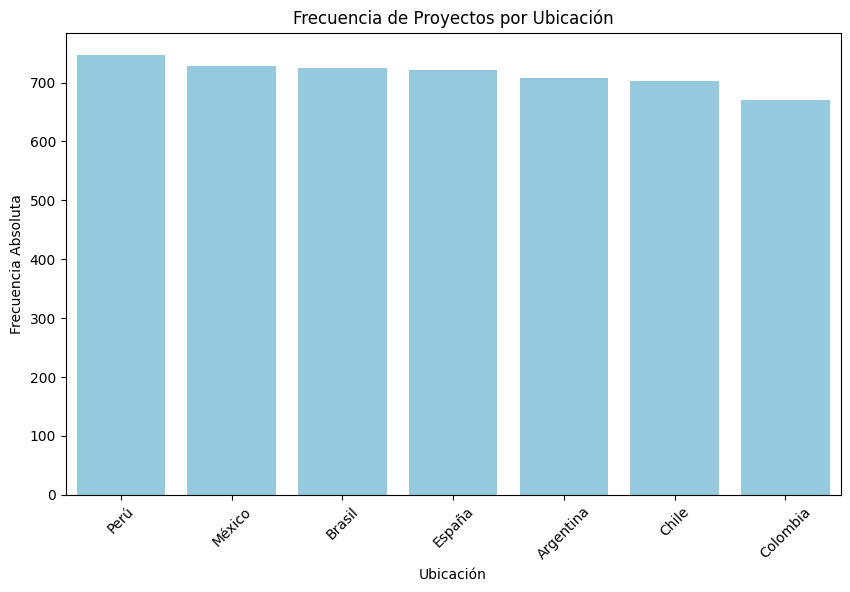

                                  count          mean           std  \
Duración (Meses)                 5000.0     15.122800      5.488656   
Tiempo Retorno Inversión (Años)  5000.0      5.982792      3.175639   
Costo Estimado (USD)             5000.0  64982.302000  20186.184428   
Eficiencia Energética (%)        5000.0     77.409761     10.112170   
Consumo Agua (m^3)               5000.0    276.776999    130.063539   
Costo Mantenimiento (USD)        5000.0   6537.222637   2843.198750   

                                          min           25%           50%  \
Duración (Meses)                     6.000000     10.000000     15.000000   
Tiempo Retorno Inversión (Años)      1.540000      3.710000      5.190000   
Costo Estimado (USD)             30011.000000  47493.750000  64884.000000   
Eficiencia Energética (%)           60.000482     68.762151     77.466153   
Consumo Agua (m^3)                  50.051792    163.038122    280.516493   
Costo Mantenimiento (USD)         1542.4

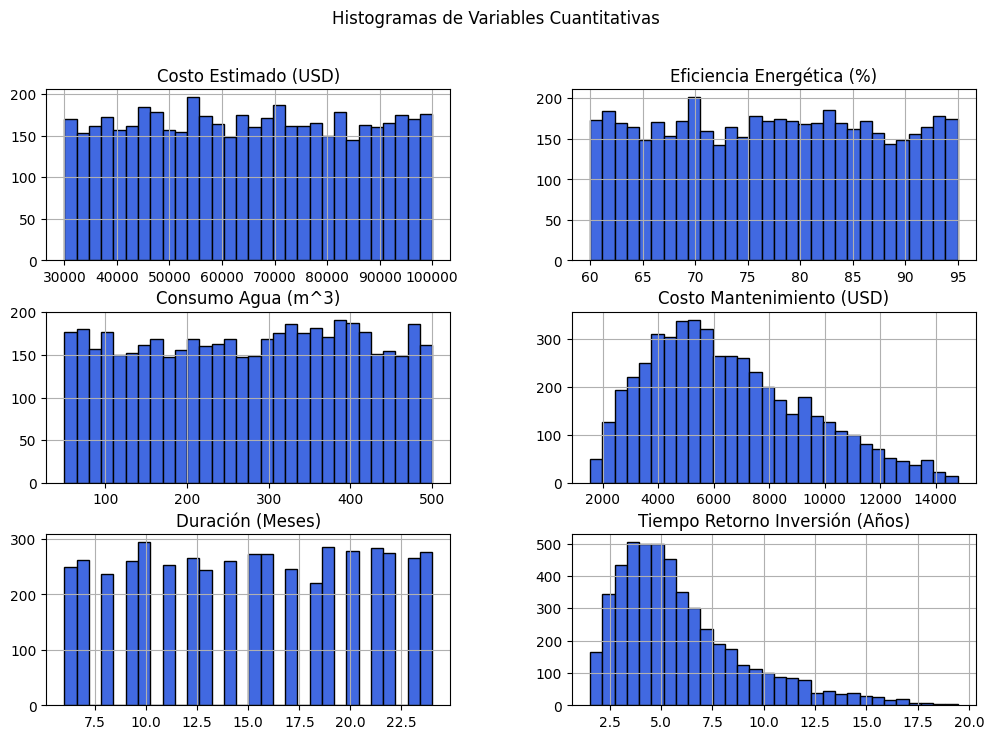

<Figure size 1200x800 with 0 Axes>

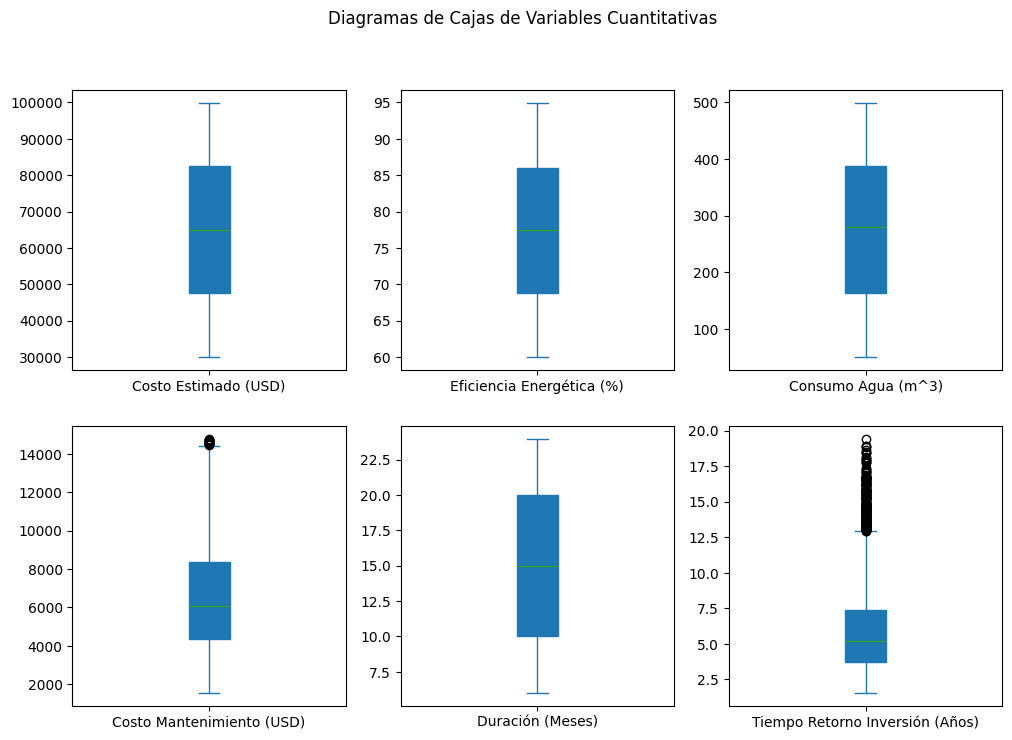

Impacto Ambiental                           Alto  Bajo  Medio
Nombre Proyecto                                              
Automatización de invernaderos               173   188    165
Diseño de estructuras sismorresistentes      163   145    169
Diseño de puente para maquinaria agrícola    162   139    182
Estructura para almacenamiento de granos     182   162    183
Fabricación de turbinas eólicas              148   179    170
Maquinaria para procesamiento de alimentos   183   175    168
Mecanización de procesos agrícolas           161   167    157
Optimización de sistemas hidráulicos         148   167    168
Sistema de control térmico en invernaderos   182   158    152
Sistema de riego automatizado                176   154    174


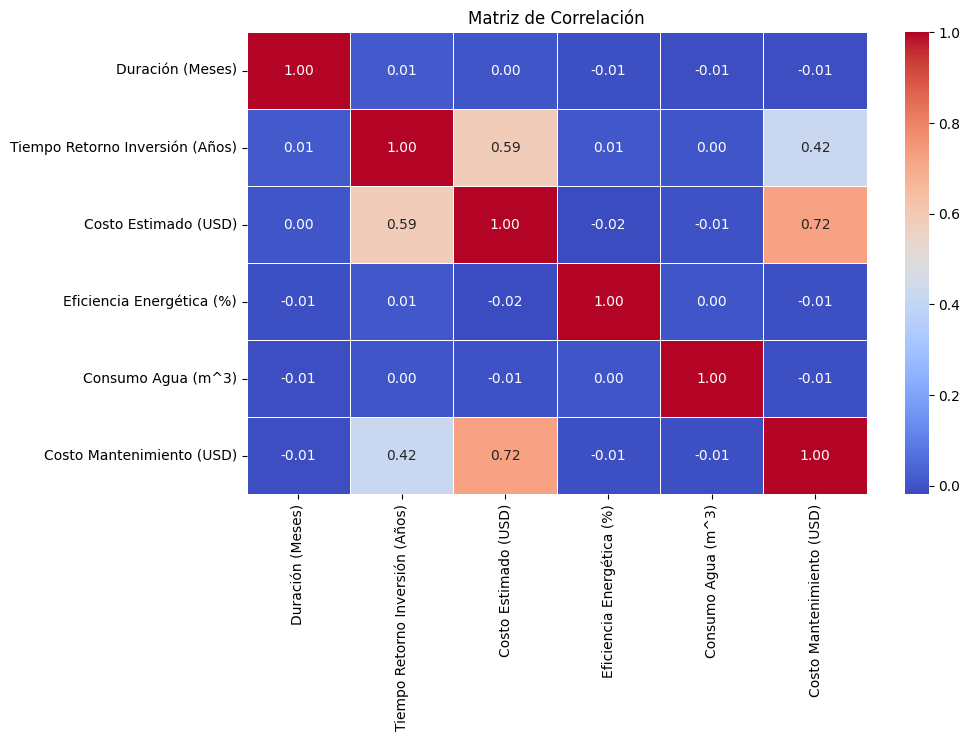

In [ ]:
# cargar archivo desde google drive
from google.colab import drive
drive.mount('/content/drive')

#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar base de datos
file_path = "/content/drive/MyDrive/BDatosS3yS4_EstadisticaIng.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

#clasificacion de variables
cualitativas_nominales = ["ID Proyecto", "Nombre Proyecto", "Área Principal", "Área Secundaria", "Ubicación", "Impacto Ambiental"]
cuantitativas_discretas = ["Duración (Meses)", "Tiempo Retorno Inversión (Años)"]
cuantitativas_continuas = ["Costo Estimado (USD)", "Eficiencia Energética (%)", "Consumo Agua (m^3)", "Costo Mantenimiento (USD)"]

# tabla de frecuencia
tabla_frecuencia = df["Ubicación"].value_counts().reset_index()
tabla_frecuencia.columns = ["Ubicación", "Frecuencia Absoluta"]
tabla_frecuencia["Frecuencia Relativa"] = tabla_frecuencia["Frecuencia Absoluta"] / df.shape[0]
print(tabla_frecuencia)

# DIAGRAMA DE BARRAS
plt.figure(figsize=(10,6))
sns.barplot(x=tabla_frecuencia["Ubicación"], y=tabla_frecuencia["Frecuencia Absoluta"], color="skyblue")
plt.xticks(rotation=45)
plt.title("Frecuencia de Proyectos por Ubicación")
plt.xlabel("Ubicación")
plt.ylabel("Frecuencia Absoluta")
plt.show()

# MEDIDAS ESTADÍSTICAS
estadisticas = df[cuantitativas_discretas + cuantitativas_continuas].describe().T
estadisticas["Rango"] = estadisticas["max"] - estadisticas["min"]
print(estadisticas)

#HISTOGRAMAS
df[cuantitativas_continuas + cuantitativas_discretas].hist(figsize=(12, 8), bins=30, color="royalblue", edgecolor="black")
plt.suptitle("Histogramas de Variables Cuantitativas")
plt.show()

# DIAGRAMAS DE CAJAS
plt.figure(figsize=(12,8))
df[cuantitativas_continuas + cuantitativas_discretas].plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8), patch_artist=True)
plt.suptitle("Diagramas de Cajas de Variables Cuantitativas")
plt.show()

#TABLA DE CONTINGENCIA (Nombre Proyecto vs Impacto Ambiental)
tabla_contingencia = pd.crosstab(df["Nombre Proyecto"], df["Impacto Ambiental"])
print(tabla_contingencia)

#MATRIZ DE CORRELACIÓN
plt.figure(figsize=(10, 6))
sns.heatmap(df[cuantitativas_discretas + cuantitativas_continuas].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


